In [1]:
import numpy as np
print(np.__version__)


2.2.6


✅ Dataset Loaded: (400, 4096) (400,)

📊 Classification Report:
               precision    recall  f1-score   support

        cats       1.00      1.00      1.00        44
        dogs       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



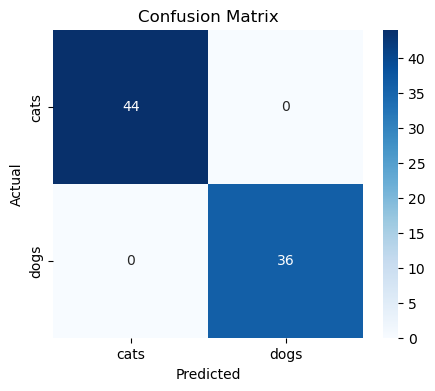

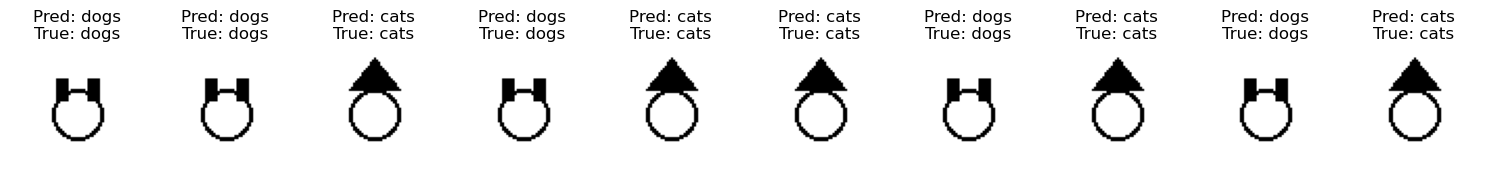

In [ ]:
# ----------------------------
# 📌 Import Libraries
# ----------------------------
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ----------------------------
# 📌 Load Dataset 
# ----------------------------
data_dir = r"C:\Users\maruthi\Downloads\cats_dogs_dataset_task3"
 # <-- unzip here
categories = ["cats", "dogs"]

data = []
labels = []

IMG_SIZE = 64  # resize to 64x64

for category in categories:
    folder = os.path.join(data_dir, category)
    class_label = categories.index(category)  # 0=cat, 1=dog
    
    for img in os.listdir(folder):
        try:
            img_path = os.path.join(folder, img)
            img_array = Image.open(img_path).convert("L")  # grayscale
            img_resized = img_array.resize((IMG_SIZE, IMG_SIZE))
            data.append(np.array(img_resized).flatten())
            labels.append(class_label)
        except Exception as e:
            print("Error loading:", img, e)

# Convert to numpy arrays
X = np.array(data)
y = np.array(labels)

print("✅ Dataset Loaded:", X.shape, y.shape)

# ----------------------------
# 📌 Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 📌 Train SVM Model
# ----------------------------
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# ----------------------------
# 📌 Predictions & Evaluation
# ----------------------------
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=categories))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ----------------------------
# 📌 Visualize Sample Predictions
# ----------------------------
num_samples = min(10, len(X_test))
fig, axes = plt.subplots(1, num_samples, figsize=(15,4))

for i in range(num_samples):
    axes[i].imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE), cmap="gray")
    axes[i].set_title(f"Pred: {categories[y_pred[i]]}\nTrue: {categories[y_test[i]]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()
